In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [12]:
data_dir=r"C:\Users\ymts0418\Documents\projects\MAY\business\TK100499 - TRAFFIC SIGN\SOURCE CODE-YMTS-0418\CODE\backend\dataset\Train"
Action=[]
for file in os.listdir(data_dir):
    Action+=[file]
print(Action)
print(len(Action))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']
43


In [13]:
img_height,img_width=224,224
batch_size=20

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 27447 images belonging to 43 classes.
Found 11762 images belonging to 43 classes.


In [15]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(43, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [16]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)

Epoch 1/5


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1373/1373 [==============================] - 5600s 4s/step - loss: 0.2301 - accuracy: 0.9502 - val_loss: 0.0781 - val_accuracy: 0.9797
Epoch 2/5
1373/1373 [==============================] - 5891s 4s/step - loss: 0.0503 - accuracy: 0.9883 - val_loss: 0.0581 - val_accuracy: 0.9844
Epoch 3/5
1373/1373 [==============================] - 6056s 4s/step - loss: 0.0284 - accuracy: 0.9936 - val_loss: 0.1432 - val_accuracy: 0.9651
Epoch 4/5
1373/1373 [==============================] - 5856s 4s/step - loss: 0.0254 - accuracy: 0.9940 - val_loss: 0.0740 - val_accuracy: 0.9830
Epoch 5/5
1373/1373 [==============================] - 5829s 4s/step - loss: 0.0262 - accuracy: 0.9940 - val_loss: 0.0307 - val_accuracy: 0.9921


In [17]:
model1.save(r"C:\Users\ymts0418\Documents\Projects\MAY\business\TK100499 - TRAFFIC SIGN\SOURCE CODE-YMTS-0418\CODE\webapp\home\models\mobilenet.h5")

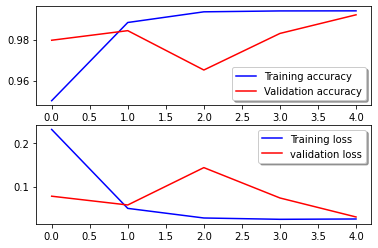

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig("mobilenet_loss.png")

In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [20]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model_predict = model1.predict_generator(test_generator,steps = nb_samples, verbose=2)

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


11762/11762 - 471s - 471s/epoch - 40ms/step


Confusion matrix, without normalization
[[ 1  5  3 ...  1  3  4]
 [ 3 31 41 ... 24 21 37]
 [ 1 35 40 ... 20 33 22]
 ...
 [ 1 23 19 ...  9 15 19]
 [ 2 16 22 ... 15 16 17]
 [ 3 24 20 ... 18 19 17]]


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

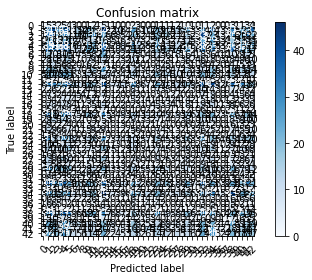

In [21]:
y_true = test_generator.classes
y_pred = model_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['0','1','2','3','4','5','6','7','8','9','10',
'11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30',
'31','32','33','34','35','36','37','38','39','40','41','42'],
                      title='Confusion matrix')